## All needed imports

In [79]:
import pandas as pd                      # pandas is a dataframe library
import matplotlib.pyplot as plt          # matpoltlib.pypolt plots data
import numpy as np                       # numpy provides N-dim object support
import seaborn as sns
from apyori import apriori

from sklearn import model_selection
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.impute import SimpleImputer      # importing class imputer to replace zero missing values with mean values 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree, export_text  # both are new in 0.21
from sklearn.neighbors import KNeighborsClassifier



# do plotting inline instead of in a separate window
%matplotlib inline

seed = 42

## Load and Review data with converting strings to integers

In [49]:
def conv_binary(cell):
    if(cell == 'satisfied' or cell == 'Loyal Customer' or cell == 'Male' or cell == 'Personal Travel' or cell == 'Eco'):
        return 1
    elif(cell == 'Eco Plus'):
        return 2
    else:
        return 0

def expandRate(dataf, cell):
    return dataf.merge(dataf[cell].apply(lambda s: pd.Series({'Excellent'+cell: int(s > 3), 'Good'+cell: int(1 < s < 4), 'Bad'+cell: int(s < 2)})), 
                        left_index=True, right_index=True)

In [50]:
#loading pima data. Adjust path if necessary
df = pd.read_excel("./satisfaction.xlsx", converters={
    "satisfaction_v2" : conv_binary,
    "Gender" : conv_binary,
    "Type of Travel" : conv_binary,
    "Class" : conv_binary,
    "Customer Type" : conv_binary
})

df_assoc = df.copy()
# df = pd.read_excel("./satisfaction.xlsx")

In [4]:
df.shape   # number of rows and number of cols

(129880, 24)

In [5]:
df.head(5)  # display data

,id,satisfaction_v2,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,11112,1,0,1,65,1,1,265,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,110278,1,1,1,47,1,0,2464,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,103199,1,0,1,15,1,1,2138,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,47462,1,0,1,60,1,1,623,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,120011,1,0,1,70,1,1,354,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [6]:
df.tail(15)   # dispay the end of the data

,id,satisfaction_v2,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
129865,82526,1,0,0,59,1,1,2641,4,5,...,2,2,1,5,2,3,3,2,5,0.0
129866,51023,1,0,0,18,1,1,1243,5,0,...,2,2,4,5,5,3,5,2,0,0.0
129867,86234,1,0,0,30,1,1,1961,5,1,...,5,5,3,2,3,4,4,5,0,0.0
129868,8518,1,0,0,45,1,1,1612,5,2,...,2,2,2,5,4,3,4,2,0,0.0
129869,80330,1,0,0,55,1,1,1953,5,2,...,5,1,1,1,3,3,4,1,0,0.0
129870,22432,1,0,0,70,1,1,1674,5,4,...,5,5,3,2,4,5,4,5,54,46.0
129871,91851,1,0,0,35,1,1,3287,5,4,...,2,2,4,5,4,4,3,2,9,0.0
129872,41573,1,0,0,69,1,1,2240,5,4,...,4,4,5,4,4,3,4,4,4,0.0
129873,46936,1,0,0,63,1,1,1942,5,5,...,3,3,5,2,5,3,5,3,7,NaN
129874,53969,1,0,0,11,1,1,2752,5,5,...,2,2,3,5,3,5,4,2,5,0.0


In [7]:
print("The dataset contains columns of the following data types : \n" + str(df.dtypes))

The dataset contains columns of the following data types : 
id                                     int64
satisfaction_v2                        int64
Gender                                 int64
Customer Type                          int64
Age                                    int64
Type of Travel                         int64
Class                                  int64
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            i

**This expalanation about this dataset**
* **Satisfaction:** Airline satisfaction level(Satisfaction, neutral or dissatisfaction)
* **Age:** The actual age of the passengers
* **Gender:** Gender of the passengers (Female, Male)
* **Type of Travel:** Purpose of the flight of the passengers (Personal Travel, Business Travel)"
* **Class:** Travel class in the plane of the passengers (Business, Eco, Eco Plus)"
* **Customer Type:** The customer type (Loyal customer, disloyal customer
* **Flight distance:** The flight distance of this journey
* **Inflight wifi service:** Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)"
* **Ease of Online booking:** Satisfaction level of online booking
* **Inflight service:** Satisfaction level of inflight service
* **Online boarding:** Satisfaction level of online boarding
* **Inflight entertainment:** Satisfaction level of inflight entertainment
* **Food and drink:** Satisfaction level of Food and drink
* **Seat comfort:** Satisfaction level of Seat comfort
* **On-board service:** Satisfaction level of On-board service
* **Leg room service:** Satisfaction level of Leg room service
* **Departure/Arrival time convenient:** Satisfaction level of Departure/Arrival time convenient
* **Baggage handling:** Satisfaction level of baggage handling
* **Gate location:** Satisfaction level of Gate location
* **Cleanliness:** Satisfaction level of Cleanliness
* **Check-in service:** Satisfaction level of Check-in service
* **Departure Delay in Minutes:** Minutes delayed when departure
* **Arrival Delay in Minutes:** Minutes delayed when Arrival

In [8]:
df.isnull().values.any()   # check if there are any null values exist

True

In [9]:
df = df.dropna() # drop all nan values

In [10]:
df.isnull().values.any()   # check if there are any null values exist

False

In [11]:
df.shape

(129487, 24)

In [12]:
def plot_corr(df, size=24):
    """
    Function plots a graphical correlation matrix for each pair of columns in the dataframe.
    
    Input:
        df: pandas DataFrame
        size: vertical and Horizontal size of the plot
        
        Displays:
            matrix of correlation between columns.  darkblue-Blue-cyan-red-yellow => less to more correlated
                                                    0 -----------------> 1
                                                    Expect a darkred line running from top left to bottom right.
    """
    corr = df.corr()     # dataframe correlation function
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)   # draw x tick marks
    plt.yticks(range(len(corr.columns)), corr.columns)   # draw y tick marks

def plot_corr_v2(df):
    fig = plt.figure(figsize=(18,10))
    sns.heatmap(df.corr(),annot=True)
    plt.tight_layout()

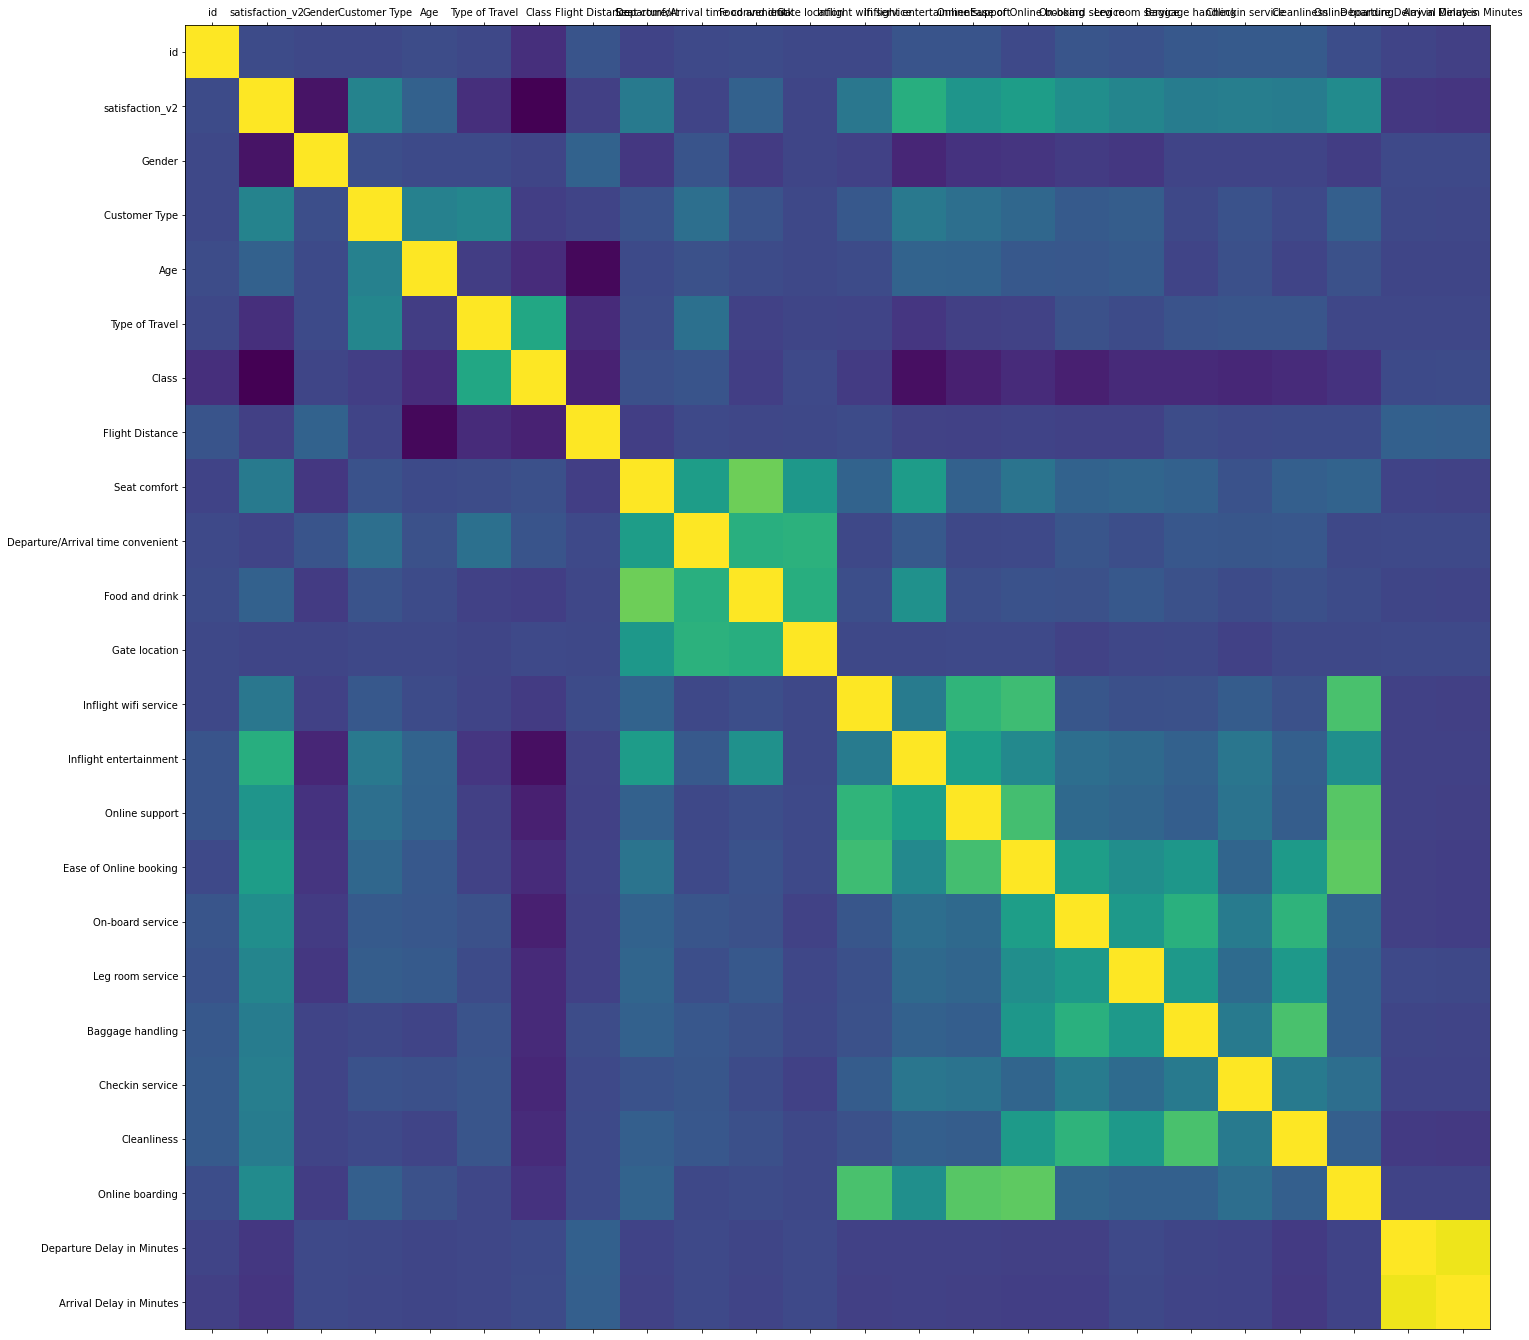

In [13]:
plot_corr(df)

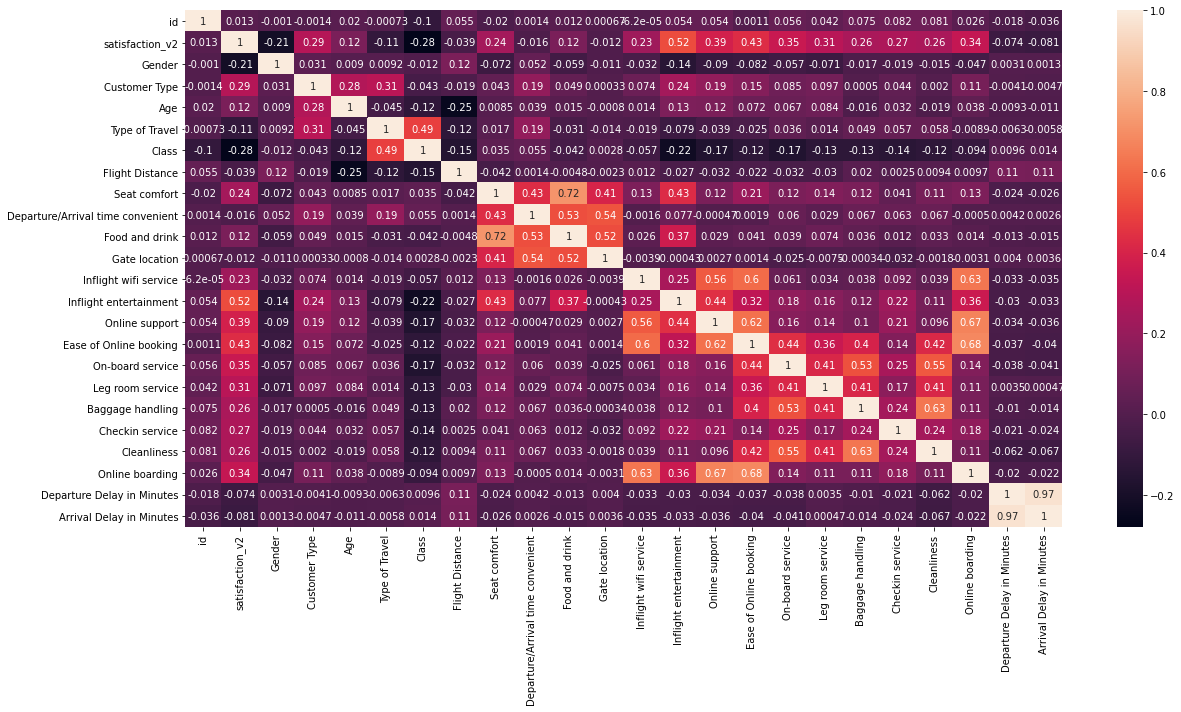

In [14]:
plot_corr_v2(df)

   _From this graph we try using features with correlation more than 0.1 with our target's satisfaction._

## Renaming data labels to drop cols 


In [15]:
'''
df.head()
df.rename(columns={"Food and drink":'FD',"Online boarding":'OB',
                   'Ease of Online booking':'EOOB','Online support':'OS',
                    'Baggage handling':'BH','Departure Delay in Minutes':'DDIM'}, inplace=True)
'''

'\ndf.head()\ndf.rename(columns={"Food and drink":\'FD\',"Online boarding":\'OB\',\n                   \'Ease of Online booking\':\'EOOB\',\'Online support\':\'OS\',\n                    \'Baggage handling\':\'BH\',\'Departure Delay in Minutes\':\'DDIM\'}, inplace=True)\n'

In [16]:
df.head()

,id,satisfaction_v2,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,11112,1,0,1,65,1,1,265,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,110278,1,1,1,47,1,0,2464,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,103199,1,0,1,15,1,1,2138,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,47462,1,0,1,60,1,1,623,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,120011,1,0,1,70,1,1,354,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [17]:
# dropping cols
##columns = ['FD', 'OB', 'EOOB','OS', 'BH', 'DDIM','id']
columns = ['Gender', 'Type of Travel', 'Class','Flight Distance', 'Departure/Arrival time convenient', 
           'Gate location', 'Departure Delay in Minutes', 'id', 'Arrival Delay in Minutes']
df.drop(columns, inplace = True, axis=1)

In [18]:
df.shape

(129487, 15)

In [19]:
df.head()

,satisfaction_v2,Customer Type,Age,Seat comfort,Food and drink,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding
0,1,1,65,0,0,2,4,2,3,3,0,3,5,3,2
1,1,1,47,0,0,0,2,2,3,4,4,4,2,3,2
2,1,1,15,0,0,2,0,2,2,3,3,4,4,4,2
3,1,1,60,0,0,3,4,3,1,1,0,1,4,1,3
4,1,1,70,0,0,4,3,4,2,2,0,2,4,2,5


# check true and false ratio

In [20]:
num_true = len(df.loc[df['satisfaction_v2'] == True])   # satisfication statuses are true
num_false = len(df.loc[df['satisfaction_v2'] == False]) # satisfication statuses are false

print("Number of True cases: {0} ({1:2.2f}%)".format(num_true,(num_true/ (num_true + num_false)) * 100))
print("Number of False cases: {0} ({1:2.2f}%)".format(num_false,(num_false/ (num_true + num_false)) * 100))


Number of True cases: 70882 (54.74%)
Number of False cases: 58605 (45.26%)


## renaming the data

In [21]:
df.rename(columns={"Food and drink":'FD',"Online boarding":'OB',
                   'Ease of Online booking':'EOOB','Online support':'OS', 'Baggage handling':'BH', 
                   'Customer Type':'Customer_Type',
                   'Seat comfort':'Seat_comfort',
                  'Inflight wifi service':'Inflight_wifi_service',
                  'Inflight entertainment':'Inflight_entertainment',
                  'On-board service':'On_board_service', 'Leg room service':'Leg_room_service',
                  'Checkin service':'Checkin_service'}
          ,inplace=True)

In [22]:
print("Finally, the dataset contains columns of the following data types : \n" + str(df.dtypes))

Finally, the dataset contains columns of the following data types : 
satisfaction_v2           int64
Customer_Type             int64
Age                       int64
Seat_comfort              int64
FD                        int64
Inflight_wifi_service     int64
Inflight_entertainment    int64
OS                        int64
EOOB                      int64
On_board_service          int64
Leg_room_service          int64
BH                        int64
Checkin_service           int64
Cleanliness               int64
OB                        int64
dtype: object


In [23]:
df.head()

,satisfaction_v2,Customer_Type,Age,Seat_comfort,FD,Inflight_wifi_service,Inflight_entertainment,OS,EOOB,On_board_service,Leg_room_service,BH,Checkin_service,Cleanliness,OB
0,1,1,65,0,0,2,4,2,3,3,0,3,5,3,2
1,1,1,47,0,0,0,2,2,3,4,4,4,2,3,2
2,1,1,15,0,0,2,0,2,2,3,3,4,4,4,2
3,1,1,60,0,0,3,4,3,1,1,0,1,4,1,3
4,1,1,70,0,0,4,3,4,2,2,0,2,4,2,5


## Prepare data for building classification model (except Naive Bayes)

In [24]:
#from sklearn.cross_validation import train_test_split ## Omar: it's deprecated 
'''
feature_col_names = ['Gender', 'Customer_Type', 'Age', 'Type_of_Travel', 
                     'Class', 'Flight_Distance', 'Seat_comfort', 
                     'Arival_time','Gate_location','Inflight_wifi_service',
                    'Inflight_entertainment','On_board_service','Leg_room_service',
                    'Checkin_service','Cleanliness','Arrival_Delay_in_Minutes']
'''

feature_col_names = ['Customer_Type', 'Age', 'BH', 
                     'FD', 'Seat_comfort', 'Leg_room_service',
                     'OB','OS','Inflight_wifi_service',
                    'Inflight_entertainment','On_board_service',
                    'Checkin_service','Cleanliness','EOOB']
predicted_class_names = ['satisfaction_v2']


x = df[feature_col_names].values           # predictor feature columns (8 x m)
y = df[predicted_class_names].values       # predictor class (1 = true , 0 = false) column (1 x m)
split_test_size = 0.30

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=split_test_size, random_state=seed, stratify=y)

                            # test_size = 0.3 is 30% , 42 is the answer to everything
models = []
names = []
results = []

In [23]:
print("{0:0.2f}% in training set".format((len(x_train)/len(df.index))*100))
print("{0:0.2f}% in test set".format((len(x_test)/len(df.index))*100))

70.00% in training set
30.00% in test set


In [24]:
print("Original True : {0} ({1:0.2f}%)".format(len(df.loc[df['satisfaction_v2'] == 1]), (len(df.loc[df['satisfaction_v2'] == 1]) / len(df.index))*100))
print("Original False : {0} ({1:0.2f}%)".format(len(df.loc[df['satisfaction_v2'] == 0]), (len(df.loc[df['satisfaction_v2'] == 0]) / len(df.index))*100))
print("")
print("Training True : {0} ({1:0.3f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1]) / len(y_train) * 100.0 )))
print("Training False : {0} ({1:0.3f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0]) / len(y_train) * 100.0 )))
print("")
print("Test True : {0} ({1:0.3f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1]) / len(y_test) * 100.0 )))
print("Test False : {0} ({1:0.3f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0]) / len(y_test) * 100.0 )))


Original True : 70882 (54.74%)
Original False : 58605 (45.26%)

Training True : 49617 (54.741%)
Training False : 41023 (45.259%)

Test True : 21265 (54.740%)
Test False : 17582 (45.260%)


In [25]:
#from sklearn.preprocessing import Imputer    ## Omar: it's deprecated 
#Impute with mean all 0 readings
fill_0 = SimpleImputer(missing_values=0, strategy="mean", verbose=0)  # axis=0 -> col, verbose = axis

x_train = fill_0.fit_transform(x_train)
x_test = fill_0.fit_transform(x_test)

<a id="top"></a>
# Table of Algorithms

1. [Naive Bayes](#NB)
2. [Random Forest](#RF)
3. [Decision Tree](#DT)
4. [K-Nearest Neigbors](#KNN)
5. [Logistic Regression](#LR)
6. [Gradient Boosting](#GB)

<a id='NB'></a>
## 1. Naive Bayes Algorithm
[Top](#top)

In [26]:

#from sklearn.cross_validation import train_test_split ## Omar: it's deprecated 
## Omar: Remove non categorical elements: ['Age', 'Flight_Distance', 'Arrival_Delay_in_Minutes']
categorical_feature_col_names = ['Customer_Type', 'BH', 
                     'FD', 'Seat_comfort', 'Leg_room_service',
                     'OB','OS','Inflight_wifi_service',
                    'Inflight_entertainment','On_board_service',
                    'Checkin_service','Cleanliness','EOOB']
predicted_class_names = ['satisfaction_v2']


x_cat = df[categorical_feature_col_names].values           # predictor feature columns (8 x m)
y = df[predicted_class_names].values       # predictor class (1 = true , 0 = false) column (1 x m)
split_test_size = 0.30

x_train_cat, x_test_cat, y_train_cat, y_test_cat = train_test_split(x_cat, y, test_size=split_test_size, random_state=seed, stratify=y)

                            # test_size = 0.3 is 30% , 42 is the answer to everything

In [27]:
print("{0:0.2f}% in training set".format((len(x_train_cat)/len(df.index))*100))
print("{0:0.2f}% in test set".format((len(x_test_cat)/len(df.index))*100))

70.00% in training set
30.00% in test set


In [28]:
print("Original True : {0} ({1:0.2f}%)".format(len(df.loc[df['satisfaction_v2'] == 1]), (len(df.loc[df['satisfaction_v2'] == 1]) / len(df.index))*100))
print("Original False : {0} ({1:0.2f}%)".format(len(df.loc[df['satisfaction_v2'] == 0]), (len(df.loc[df['satisfaction_v2'] == 0]) / len(df.index))*100))
print("")
print("Training True : {0} ({1:0.3f}%)".format(len(y_train_cat[y_train_cat[:] == 1]), (len(y_train_cat[y_train_cat[:] == 1]) / len(y_train_cat) * 100.0 )))
print("Training False : {0} ({1:0.3f}%)".format(len(y_train_cat[y_train_cat[:] == 0]), (len(y_train_cat[y_train_cat[:] == 0]) / len(y_train_cat) * 100.0 )))
print("")
print("Test True : {0} ({1:0.3f}%)".format(len(y_test_cat[y_test_cat[:] == 1]), (len(y_test_cat[y_test_cat[:] == 1]) / len(y_test_cat) * 100.0 )))
print("Test Fasle : {0} ({1:0.3f}%)".format(len(y_test_cat[y_test_cat[:] == 0]), (len(y_test_cat[y_test_cat[:] == 0]) / len(y_test_cat) * 100.0 )))


Original True : 70882 (54.74%)
Original False : 58605 (45.26%)

Training True : 49617 (54.741%)
Training False : 41023 (45.259%)

Test True : 21265 (54.740%)
Test Fasle : 17582 (45.260%)


In [29]:
#from sklearn.preprocessing import Imputer    ## Omar: it's deprecated 
#Impute with mean all 0 readings
fill_0 = SimpleImputer(missing_values=0, strategy="mean", verbose=0)  # axis=0 -> col, verbose = axis

x_train_cat = fill_0.fit_transform(x_train_cat)
x_test_cat = fill_0.fit_transform(x_test_cat)

In [30]:
# create Gaussian Naive Bayes model object and train it with the data
nb_model = GaussianNB()

nb_model.fit(x_train_cat,y_train_cat.ravel());

models.append(nb_model)
names.append("NB")

In [31]:
# predict values using the training data
nb_predict_train = nb_model.predict(x_train_cat)

acc_train = metrics.accuracy_score(y_train_cat, nb_predict_train)

# predict values using the test data
nb_predict_test = nb_model.predict(x_test_cat)

acc_test = metrics.accuracy_score(y_test_cat, nb_predict_test)

results.append((acc_train, acc_test))

#Accuracy
print("Accuracy on training data: {:.2%}".format(acc_train)) # accuracy on training data
print("Accuracy on testing data: {:.2%}".format(acc_test)) # accuracy on testing data

Accuracy on training data: 79.63%
Accuracy on testing data: 79.49%


Confucsion Matrix
[[13332  4250]
 [ 3717 17548]]

Classification Report
              precision    recall  f1-score   support

           0       0.78      0.76      0.77     17582
           1       0.81      0.83      0.81     21265

    accuracy                           0.79     38847
   macro avg       0.79      0.79      0.79     38847
weighted avg       0.79      0.79      0.79     38847



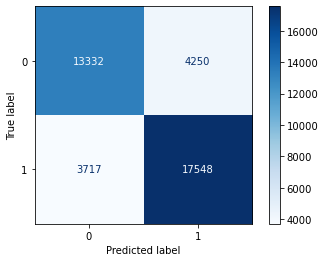

In [32]:
#print("Confucsion Matrix")   # left col predicted false , right predicted true
#print("{0}".format(metrics.confusion_matrix(y_test, nb_predict_test)))
# plot confusion matrix
confM = metrics.plot_confusion_matrix(nb_model, x_test_cat, y_test_cat, cmap='Blues', values_format='d')
print("Confucsion Matrix")
print(confM.confusion_matrix)
print("")
print("Classification Report")
print(metrics.classification_report(y_test_cat, nb_predict_test))

<a id='RF'></a>
## 2. Random Forest Algorithm
[Top](#top)

In [33]:
# Create random forest object
rf_model = RandomForestClassifier(random_state=seed, n_estimators=10)  # n_estimators will change from 10 in version 0.20 to 100 in 0.22
rf_model.fit(x_train, y_train.ravel());

models.append(rf_model)
names.append("RF")

In [34]:
# predict values using the training data
rf_predict_train = rf_model.predict(x_train)

acc_train = metrics.accuracy_score(y_train, rf_predict_train)

# predict values using the test data
rf_predict_test = rf_model.predict(x_test)

acc_test = metrics.accuracy_score(y_test, rf_predict_test)

results.append((acc_train, acc_test))

#Accuracy
print("Accuracy on training data: {:.2%}".format(acc_train)) # accuracy on training data
print("Accuracy on testing data: {:.2%}".format(acc_test)) # accuracy on testing data

Accuracy on training data: 99.42%
Accuracy on testing data: 92.84%


Confucsion Matrix
[[16438  1144]
 [ 1638 19627]]

Classification Report
              precision    recall  f1-score   support

           0       0.91      0.93      0.92     17582
           1       0.94      0.92      0.93     21265

    accuracy                           0.93     38847
   macro avg       0.93      0.93      0.93     38847
weighted avg       0.93      0.93      0.93     38847



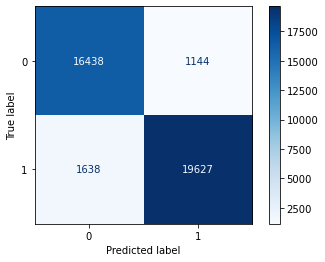

In [35]:
#print("Confucsion Matrix")   # left col predicted false , right predicted true
#print("{0}".format(metrics.confusion_matrix(y_test, rf_predict_test)))
# plot confusion matrix
confM = metrics.plot_confusion_matrix(rf_model, x_test, y_test, cmap='Blues', values_format='d')
print("Confucsion Matrix")
print(confM.confusion_matrix)
print("")
print("Classification Report")
print(metrics.classification_report(y_test, rf_predict_test))

<a id='DT'></a>
## 3. Decision Tree Algorithm
[Top](#top)

In [36]:
# Create Decision Tree object
dt_model = DecisionTreeClassifier(random_state=seed, max_depth=10)
dt_model.fit(x_train, y_train.ravel());

models.append(dt_model)
names.append("DT")

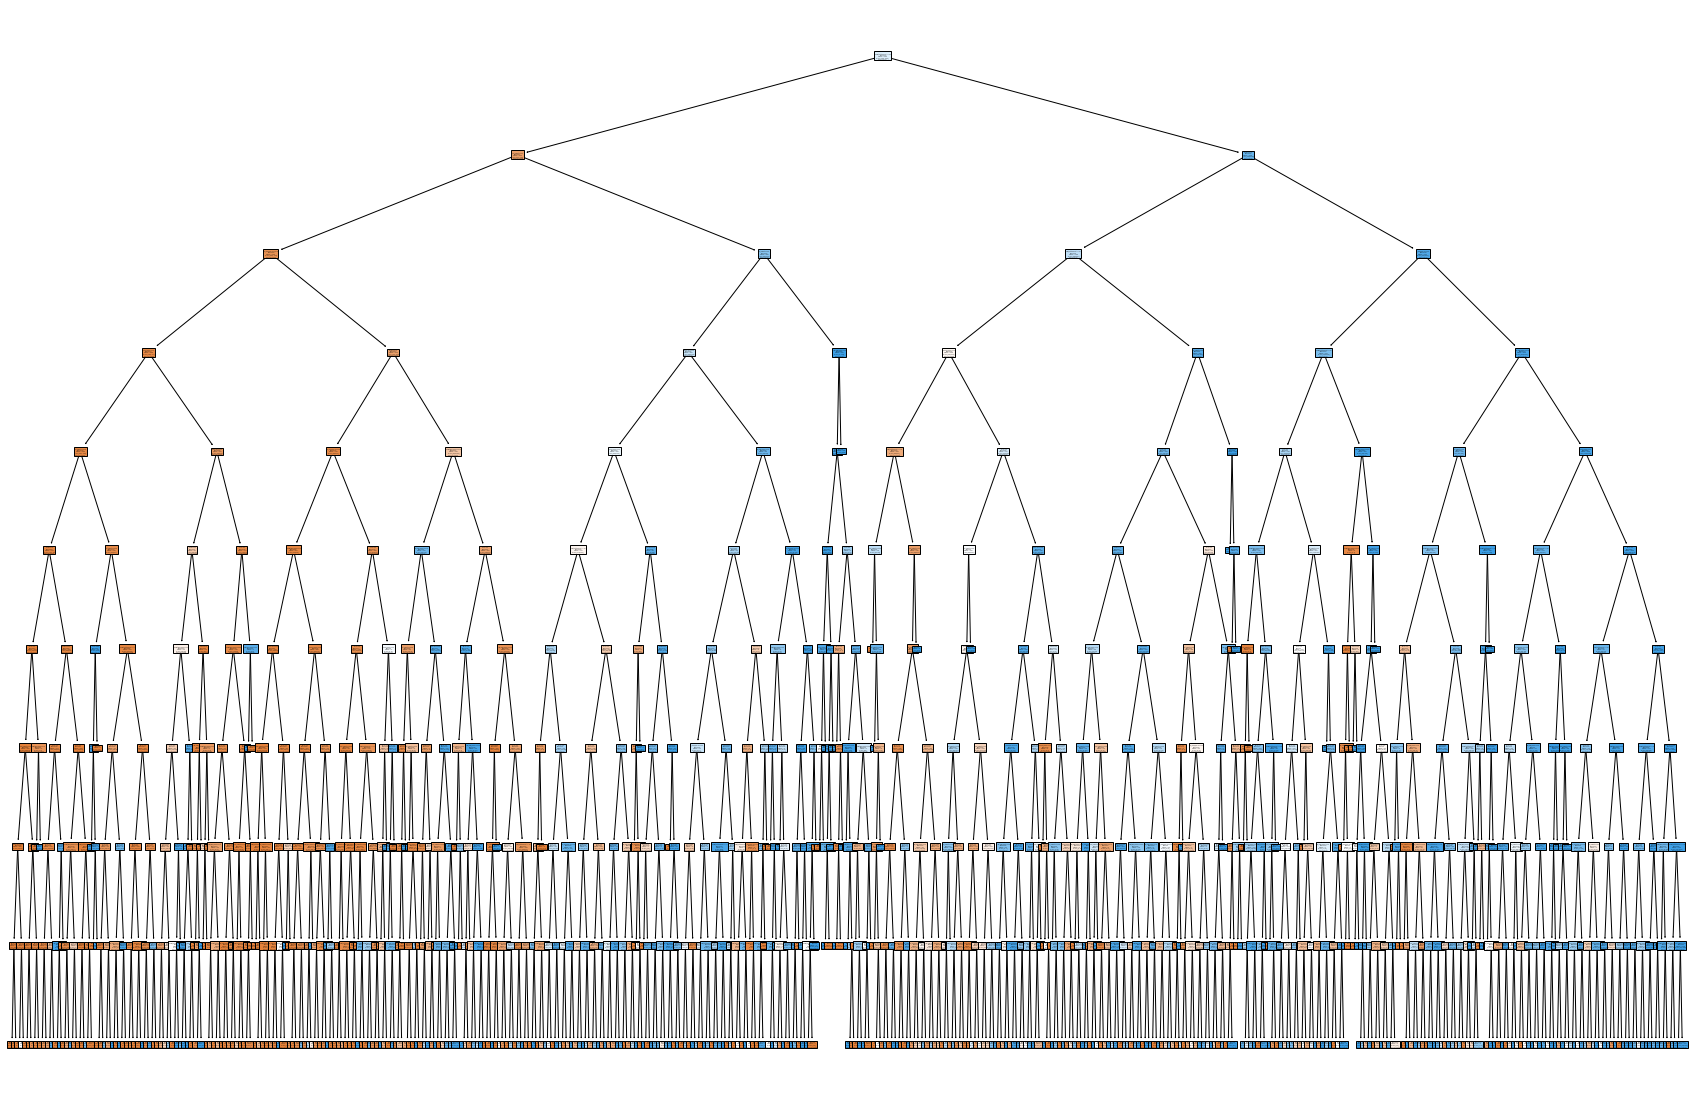

In [37]:
plt.figure(figsize=(30, 20))
plot_tree(dt_model, feature_names=feature_col_names, class_names=['dissatisfied', 'Satisfied'], filled=True);

In [38]:
print(export_text(dt_model, feature_names=feature_col_names, show_weights=True))

|--- Inflight_entertainment <= 3.23
|   |--- Seat_comfort <= 3.50
|   |   |--- On_board_service <= 3.73
|   |   |   |--- Checkin_service <= 4.50
|   |   |   |   |--- Seat_comfort <= 2.48
|   |   |   |   |   |--- EOOB <= 1.50
|   |   |   |   |   |   |--- OS <= 4.50
|   |   |   |   |   |   |   |--- Seat_comfort <= 1.50
|   |   |   |   |   |   |   |   |--- Cleanliness <= 4.50
|   |   |   |   |   |   |   |   |   |--- BH <= 1.50
|   |   |   |   |   |   |   |   |   |   |--- weights: [766.00, 1.00] class: 0
|   |   |   |   |   |   |   |   |   |--- BH >  1.50
|   |   |   |   |   |   |   |   |   |   |--- weights: [1220.00, 0.00] class: 0
|   |   |   |   |   |   |   |   |--- Cleanliness >  4.50
|   |   |   |   |   |   |   |   |   |--- FD <= 3.00
|   |   |   |   |   |   |   |   |   |   |--- weights: [37.00, 0.00] class: 0
|   |   |   |   |   |   |   |   |   |--- FD >  3.00
|   |   |   |   |   |   |   |   |   |   |--- weights: [1.00, 1.00] class: 0
|   |   |   |   |   |   |   |--- Seat_comfort >  

In [39]:
# predict values using the training data
dt_predict_train = dt_model.predict(x_train)

acc_train = metrics.accuracy_score(y_train, dt_predict_train)

# predict values using the test data
dt_predict_test = dt_model.predict(x_test)

acc_test = metrics.accuracy_score(y_test, dt_predict_test)

results.append((acc_train, acc_test))

#Accuracy
print("Accuracy on training data: {:.2%}".format(acc_train)) # accuracy on training data
print("Accuracy on testing data: {:.2%}".format(acc_test)) # accuracy on testing data

Accuracy on training data: 91.50%
Accuracy on testing data: 90.66%


Confucsion Matrix
[[15705  1877]
 [ 1750 19515]]

Classification Report
              precision    recall  f1-score   support

           0       0.90      0.89      0.90     17582
           1       0.91      0.92      0.91     21265

    accuracy                           0.91     38847
   macro avg       0.91      0.91      0.91     38847
weighted avg       0.91      0.91      0.91     38847



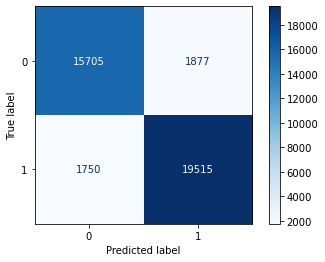

In [40]:
#print("Confucsion Matrix")   # left col predicted false , right predicted true
#print("{0}".format(metrics.confusion_matrix(y_test, dt_predict_test)))
# plot confusion matrix
confM = metrics.plot_confusion_matrix(dt_model, x_test, y_test, cmap='Blues', values_format='d')
print("Confucsion Matrix")
print(confM.confusion_matrix)
print("")
print("Classification Report")
print(metrics.classification_report(y_test, dt_predict_test))

<a id='KNN'></a>
## 4. K-Nearest Neighbors Algorithm
[Top](#top)

In [41]:
# Create KNeighbors object
knn_model = KNeighborsClassifier() # weights = 'distance' make the training accuracy 100% but doesn't make difference on testing data
knn_model.fit(x_train, y_train.ravel());

models.append(knn_model)
names.append("KNN")

In [42]:
# predict values using the training data
knn_predict_train = knn_model.predict(x_train)

acc_train = metrics.accuracy_score(y_train, knn_predict_train)

# predict values using the test data
knn_predict_test = knn_model.predict(x_test)

acc_test = metrics.accuracy_score(y_test, knn_predict_test)

results.append((acc_train, acc_test))

#Accuracy
print("Accuracy on training data: {:.2%}".format(acc_train)) # accuracy on training data
print("Accuracy on testing data: {:.2%}".format(acc_test)) # accuracy on testing data

Accuracy on training data: 91.29%
Accuracy on testing data: 87.44%


Confucsion Matrix
[[15575  2007]
 [ 2873 18392]]

Classification Report
              precision    recall  f1-score   support

           0       0.84      0.89      0.86     17582
           1       0.90      0.86      0.88     21265

    accuracy                           0.87     38847
   macro avg       0.87      0.88      0.87     38847
weighted avg       0.88      0.87      0.87     38847



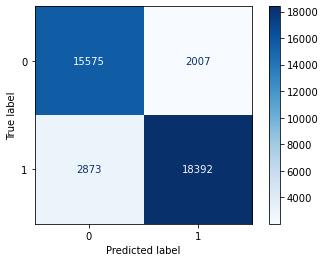

In [43]:
#print("Confucsion Matrix")   # left col predicted false , right predicted true
#print("{0}".format(metrics.confusion_matrix(y_test, knn_predict_test)))
# plot confusion matrix
confM = metrics.plot_confusion_matrix(knn_model, x_test, y_test, cmap='Blues', values_format='d')
print("Confucsion Matrix")
print(confM.confusion_matrix)
print("")
print("Classification Report")
print(metrics.classification_report(y_test, knn_predict_test))

<a id='LR'></a>
## 5. Logistic Regression Algorithm
[Top](#top)

In [45]:
# Create LogisticRegression object
lr_model = LogisticRegression(random_state=seed, max_iter=10000) 
lr_model.fit(x_train, y_train.ravel());

models.append(lr_model)
names.append("LR")

In [46]:
# predict values using the training data
lr_predict_train = lr_model.predict(x_train)

acc_train = metrics.accuracy_score(y_train, lr_predict_train)

# predict values using the test data
lr_predict_test = lr_model.predict(x_test)

acc_test = metrics.accuracy_score(y_test, lr_predict_test)

results.append((acc_train, acc_test))

#Accuracy
print("Accuracy on training data: {:.2%}".format(acc_train)) # accuracy on training data
print("Accuracy on testing data: {:.2%}".format(acc_test)) # accuracy on testing data

Accuracy on training data: 82.04%
Accuracy on testing data: 81.94%


Confucsion Matrix
[[13693  3889]
 [ 3126 18139]]

Classification Report
              precision    recall  f1-score   support

           0       0.81      0.78      0.80     17582
           1       0.82      0.85      0.84     21265

    accuracy                           0.82     38847
   macro avg       0.82      0.82      0.82     38847
weighted avg       0.82      0.82      0.82     38847



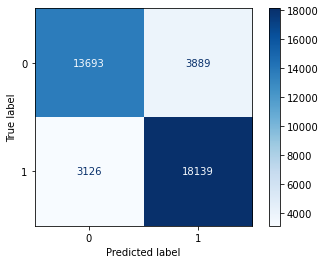

In [47]:
#print("Confucsion Matrix")   # left col predicted false , right predicted true
#print("{0}".format(metrics.confusion_matrix(y_test, lr_predict_test)))
# plot confusion matrix
confM = metrics.plot_confusion_matrix(lr_model, x_test, y_test, cmap='Blues', values_format='d')
print("Confucsion Matrix")
print(confM.confusion_matrix)
print("")
print("Classification Report")
print(metrics.classification_report(y_test, lr_predict_test))

<a id='GB'></a>
## 6. Gradient Boosting Algorithm
[Top](#top)

In [49]:
# Create LogisticRegression object
gb_model = GradientBoostingClassifier(n_estimators=10)
gb_model.fit(x_train, y_train.ravel());

models.append(gb_model)
names.append("GB")

In [50]:
# predict values using the training data
gb_predict_train = gb_model.predict(x_train)

acc_train = metrics.accuracy_score(y_train, gb_predict_train)

# predict values using the test data
gb_predict_test = gb_model.predict(x_test)

acc_test = metrics.accuracy_score(y_test, gb_predict_test)

results.append((acc_train, acc_test))

#Accuracy
print("Accuracy on training data: {:.2%}".format(acc_train)) # accuracy on training data
print("Accuracy on testing data: {:.2%}".format(acc_test)) # accuracy on testing data

Accuracy on training data: 85.07%
Accuracy on testing data: 84.89%


Confucsion Matrix
[[13722  3860]
 [ 2010 19255]]

Classification Report
              precision    recall  f1-score   support

           0       0.87      0.78      0.82     17582
           1       0.83      0.91      0.87     21265

    accuracy                           0.85     38847
   macro avg       0.85      0.84      0.85     38847
weighted avg       0.85      0.85      0.85     38847



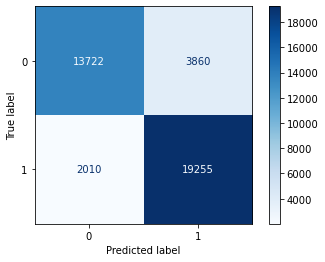

In [51]:
#print("Confucsion Matrix")   # left col predicted false , right predicted true
#print("{0}".format(metrics.confusion_matrix(y_test, gb_predict_test)))
# plot confusion matrix
confM = metrics.plot_confusion_matrix(gb_model, x_test, y_test, cmap='Blues', values_format='d')
print("Confucsion Matrix")
print(confM.confusion_matrix)
print("")
print("Classification Report")
print(metrics.classification_report(y_test, gb_predict_test))

## Algorithms accuracies comparison graph

NB: 0.796293 (0.004593)
RF: 0.927526 (0.002206)
DT: 0.906520 (0.001548)
KNN: 0.876015 (0.004240)
LR: 0.820245 (0.004965)
GB: 0.848058 (0.004521)


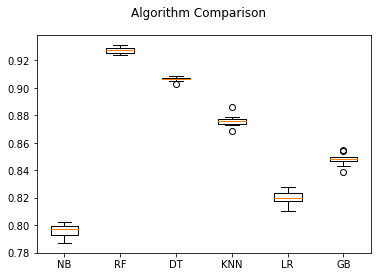

In [52]:

results_ = []
scoring = 'accuracy'
for i, model in enumerate(models):
    kfold = model_selection.KFold(n_splits=10)
    cv_results = None
    if not i:
        cv_results = model_selection.cross_val_score(models[0], x_train_cat, y_train_cat.ravel(), cv=kfold, scoring=scoring)
        results_.append(cv_results)
    else:
        cv_results = model_selection.cross_val_score(model, x_train, y_train.ravel(), cv=kfold, scoring=scoring)
        results_.append(cv_results)
    msg = "%s: %f (%f)" % (names[i], cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results_)
ax.set_xticklabels(names)
plt.show()

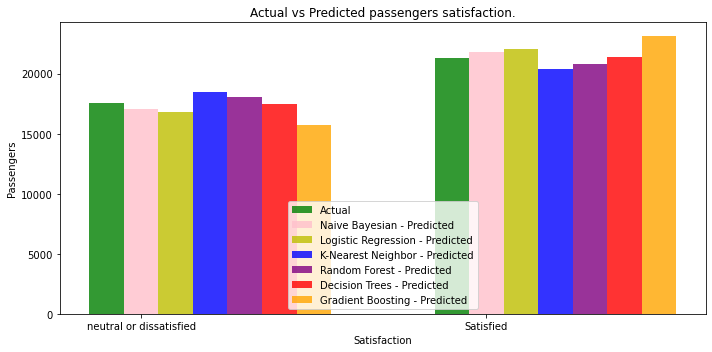

In [54]:
uniqueValues, occurCount = np.unique(y_test, return_counts=True)
frequency_actual = (occurCount[0], occurCount[1])

uniqueValues, occurCount = np.unique(knn_predict_test, return_counts=True)
frequency_predicted_knn = (occurCount[0], occurCount[1])

uniqueValues, occurCount = np.unique(dt_predict_test, return_counts=True)
frequency_predicted_dt = (occurCount[0], occurCount[1])

uniqueValues, occurCount = np.unique(rf_predict_test, return_counts=True)
frequency_predicted_rf = (occurCount[0], occurCount[1])

uniqueValues, occurCount = np.unique(lr_predict_test, return_counts=True)
frequency_predicted_lr = (occurCount[0], occurCount[1])

uniqueValues, occurCount = np.unique(nb_predict_test, return_counts=True)
frequency_predicted_nb = (occurCount[0], occurCount[1])

uniqueValues, occurCount = np.unique(gb_predict_test, return_counts=True)
frequency_predicted_gb = (occurCount[0], occurCount[1])

n_groups = 2
fig, ax = plt.subplots(figsize=(10,5))
index = np.arange(n_groups)
bar_width = 0.1
opacity = 0.8

rects1 = plt.bar(index, frequency_actual, bar_width,
alpha=opacity,
color='g',
label='Actual')

rects2 = plt.bar(index + bar_width, frequency_predicted_nb, bar_width,
alpha=opacity,
color='pink',
label='Naive Bayesian - Predicted')

rects3 = plt.bar(index + bar_width*2, frequency_predicted_lr, bar_width,
alpha=opacity,
color='y',
label='Logistic Regression - Predicted')

rects4 = plt.bar(index + bar_width*3, frequency_predicted_knn, bar_width,
alpha=opacity,
color='b',
label='K-Nearest Neighbor - Predicted')

rects5 = plt.bar(index + bar_width*4, frequency_predicted_rf, bar_width,
alpha=opacity,
color='purple',
label='Random Forest - Predicted')

rects6 = plt.bar(index + bar_width*5, frequency_predicted_dt, bar_width,
alpha=opacity,
color='red',
label='Decision Trees - Predicted')

rects7 = plt.bar(index + bar_width*6, frequency_predicted_gb, bar_width,
alpha=opacity,
color='orange',
label='Gradient Boosting - Predicted')

plt.xlabel('Satisfaction')
plt.ylabel('Passengers')
plt.title('Actual vs Predicted passengers satisfaction.')
plt.xticks(index + bar_width, ('neutral or dissatisfied', 'Satisfied'))
plt.legend()

plt.tight_layout()
plt.show()

<a id='assoc'></a>
## Association Rule Mining
[Start from here if you have encoded dataset](#check_point)

In [51]:
df_assoc.head()

,id,satisfaction_v2,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,11112,1,0,1,65,1,1,265,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,110278,1,1,1,47,1,0,2464,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,103199,1,0,1,15,1,1,2138,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,47462,1,0,1,60,1,1,623,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,120011,1,0,1,70,1,1,354,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [52]:
df_assoc.drop(["satisfaction_v2", 'id'], inplace = True, axis=1)
df_assoc.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,0,1,65,1,1,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,1,1,47,1,0,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,0,1,15,1,1,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,0,1,60,1,1,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,0,1,70,1,1,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0


In [53]:
df_assoc.shape

(129880, 22)

In [54]:
df_assoc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             129880 non-null  int64  
 1   Customer Type                      129880 non-null  int64  
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  int64  
 4   Class                              129880 non-null  int64  
 5   Flight Distance                    129880 non-null  int64  
 6   Seat comfort                       129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Food and drink                     129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Inflight wifi service              129880 non-null  int64  
 11  Inflight entertainment             1298

In [56]:
df_assoc.isnull().values.any()   # check if there are any null values exist

True

In [57]:
df_assoc = df_assoc.dropna() # drop all nan values

In [58]:
df_assoc.isnull().values.any()   # check if there are any null values exist

False

In [59]:
df_assoc.shape

(129487, 22)

In [60]:
df_assoc.rename(columns={"Food and drink":'Food&Drink',"Online boarding":'Online_boarding',
                   'Ease of Online booking':'Online_booking','Online support':'Online_support', 
                   'Baggage handling':'Baggage_handling', 
                   'Customer Type':'Customer_Type','Type of Travel':'Type_of_Travel',
                   'Flight Distance':'Flight_Distance','Seat comfort':'Seat_comfort',
                  'Departure/Arrival time convenient':'Time_convenient','Gate location':'Gate_location',
                  'Inflight wifi service':'Inflight_wifi_service',
                  'Inflight entertainment':'Inflight_entertainment',
                  'On-board service':'On_board_service', 'Leg room service':'Leg_room_service',
                  'Checkin service':'Checkin_service','Arrival Delay in Minutes':'Arrival_Delay', 
                  'Departure Delay in Minutes': 'Departure_Delay'}
          ,inplace=True)

In [61]:
df_assoc.head()

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Seat_comfort,Time_convenient,Food&Drink,Gate_location,...,Online_support,Online_booking,On_board_service,Leg_room_service,Baggage_handling,Checkin_service,Cleanliness,Online_boarding,Departure_Delay,Arrival_Delay
0,0,1,65,1,1,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,1,1,47,1,0,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,0,1,15,1,1,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,0,1,60,1,1,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,0,1,70,1,1,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0


In [63]:
cell = 'Class'
df_assoc = df_assoc.merge(df_assoc[cell].apply(lambda s: pd.Series({'Eco_Class': int(s == 1), 'Eco_Plus_Class': int(s == 2), 'Business_Class': int(s == 0)})), 
                        left_index=True, right_index=True)

In [64]:
cell = 'Flight_Distance'
mean = df_assoc[cell].mean()
df_assoc = df_assoc.merge(df_assoc[cell].apply(lambda s: pd.Series({'ShortTrip': int(s < mean - (mean/4)), 'LongTrip': int(mean - (mean/4) <= s < mean + (mean/2)), 'VeryLongTrip': int(s >= mean + (mean/2))})), 
                        left_index=True, right_index=True)

In [65]:
rate_features = ['Food&Drink', 'Online_booking', 'On_board_service', 'Checkin_service', 'Inflight_entertainment']
for feature in rate_features:
    df_assoc = expandRate(df_assoc, feature)

In [66]:
drop_features = ['Gender', 'Customer_Type', 'Age', 'Departure_Delay', 
                 'Arrival_Delay', 'Type_of_Travel', 'Flight_Distance', 'Class',
                 'Online_support', 'Online_boarding'
                ]
df_assoc.drop(drop_features, inplace = True, axis=1)
df_assoc.drop(rate_features, inplace = True, axis=1)

In [91]:
# if I decide to remove unnecessary features from association after adding them
e = 'Excellent'
g = 'Good'
b = 'Bad'
cells = []
drops = []
for cell in cells:
    drops.append(e+cell)
    drops.append(g+cell)
    drops.append(b+cell)
df_assoc.drop(drops, inplace=True, axis=1)

In [105]:
df_assoc.shape

(129487, 21)

In [106]:
df_assoc.head()

,Eco_Class,Eco_Plus_Class,Business_Class,ShortTrip,LongTrip,VeryLongTrip,ExcellentFood&Drink,GoodFood&Drink,BadFood&Drink,ExcellentOnline_booking,...,BadOnline_booking,ExcellentOn_board_service,GoodOn_board_service,BadOn_board_service,ExcellentCheckin_service,GoodCheckin_service,BadCheckin_service,ExcellentInflight_entertainment,GoodInflight_entertainment,BadInflight_entertainment
0,1,0,0,1,0,0,0,0,1,0,...,0,0,1,0,1,0,0,1,0,0
1,0,0,1,0,1,0,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
2,1,0,0,0,1,0,0,0,1,0,...,0,0,1,0,1,0,0,0,0,1
3,1,0,0,1,0,0,0,0,1,0,...,1,0,0,1,1,0,0,1,0,0
4,1,0,0,1,0,0,0,0,1,0,...,0,0,1,0,1,0,0,0,1,0


_Save the encoded dataset to save a lot of time in the next time_

In [107]:
df_assoc.to_csv(r'Passenger_satisfaction_encoded.csv')

<a id='check_point'></a>
[Top](#assoc)

In [108]:
df_assoc = pd.read_csv('Passenger_satisfaction_encoded.csv')
df_assoc = df_assoc.drop('Unnamed: 0',axis=1)

In [109]:
df_assoc.shape

(129487, 21)

In [110]:
df_assoc.head()

,Eco_Class,Eco_Plus_Class,Business_Class,ShortTrip,LongTrip,VeryLongTrip,ExcellentFood&Drink,GoodFood&Drink,BadFood&Drink,ExcellentOnline_booking,...,BadOnline_booking,ExcellentOn_board_service,GoodOn_board_service,BadOn_board_service,ExcellentCheckin_service,GoodCheckin_service,BadCheckin_service,ExcellentInflight_entertainment,GoodInflight_entertainment,BadInflight_entertainment
0,1,0,0,1,0,0,0,0,1,0,...,0,0,1,0,1,0,0,1,0,0
1,0,0,1,0,1,0,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
2,1,0,0,0,1,0,0,0,1,0,...,0,0,1,0,1,0,0,0,0,1
3,1,0,0,1,0,0,0,0,1,0,...,1,0,0,1,1,0,0,1,0,0
4,1,0,0,1,0,0,0,0,1,0,...,0,0,1,0,1,0,0,0,1,0


In [111]:
records = []
for _, row in df_assoc.iterrows():
    x = row[(row == 1)]
    records.append(x.index.to_list())

In [112]:
print(records[:5])
len(records)

[['Eco_Class', 'ShortTrip', 'BadFood&Drink', 'GoodOnline_booking', 'GoodOn_board_service', 'ExcellentCheckin_service', 'ExcellentInflight_entertainment'], ['Business_Class', 'LongTrip', 'BadFood&Drink', 'GoodOnline_booking', 'ExcellentOn_board_service', 'GoodCheckin_service', 'GoodInflight_entertainment'], ['Eco_Class', 'LongTrip', 'BadFood&Drink', 'GoodOnline_booking', 'GoodOn_board_service', 'ExcellentCheckin_service', 'BadInflight_entertainment'], ['Eco_Class', 'ShortTrip', 'BadFood&Drink', 'BadOnline_booking', 'BadOn_board_service', 'ExcellentCheckin_service', 'ExcellentInflight_entertainment'], ['Eco_Class', 'ShortTrip', 'BadFood&Drink', 'GoodOnline_booking', 'GoodOn_board_service', 'ExcellentCheckin_service', 'GoodInflight_entertainment']]


129487

In [113]:
association_rules = apriori(records, min_support=0.02, min_confidence=0.5, min_lift=3, min_length=2)

In [114]:
while True:
    try:
        item = next(association_rules)
    except:
        break
    # Contains base item and add item
    pair = item[0] 
    items = [x for x in pair]
    print("Rule: " + items[0] + " -> " + items[1])

    #second index of the inner list
    print("Support: " + str(item[1]))

    #third index of the list located at 0th
    #of the third index of the inner list

    print("Confidence: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    print("=====================================")

Rule: BadInflight_entertainment -> BadFood&Drink
Support: 0.08201595526964096
Confidence: 0.7206840390879479
Lift: 3.465251175988901
Rule: Eco_Class -> BadInflight_entertainment
Support: 0.05629908793932982
Confidence: 0.6053811659192826
Lift: 5.3195569375264755
Rule: BadInflight_entertainment -> ExcellentCheckin_service
Support: 0.03668321916485825
Confidence: 0.7906125166444741
Lift: 3.8014869269492393
Rule: ExcellentOn_board_service -> BadInflight_entertainment
Support: 0.03818143906338088
Confidence: 0.6941870261162595
Lift: 3.3378460991725247
Rule: BadInflight_entertainment -> ExcellentOnline_booking
Support: 0.033725393282723365
Confidence: 0.7118174409127955
Lift: 3.422618082862056
Rule: BadInflight_entertainment -> GoodCheckin_service
Support: 0.03246657965664507
Confidence: 0.7165501960115902
Lift: 3.4453744979930483
Rule: GoodOn_board_service -> BadInflight_entertainment
Support: 0.03303806559731865
Confidence: 0.7546304462868231
Lift: 3.6284750315017402
Rule: BadInflight_ent

## Data Visualization Bussiness Part ( skipped to be done in R language )

In [70]:
# Visualizing Gender satisification of the 
# 

'''
dataset_satisification_Gender = df[df["satisfaction_v2"] == 1]
dataset_satisification_Gender.Gender.value_counts(normalize = False).plot.bar(title="satisifaction level")
'''

'\ndataset_satisification_Gender = df[df["satisfaction_v2"] == 1]\ndataset_satisification_Gender.Gender.value_counts(normalize = False).plot.bar(title="satisifaction level")\n'

In [69]:
# Visualizing Gender dissatisification of the 
# 
'''
dataset_satisification_Gender = df[df["satisfaction_v2"] == 0]
dataset_satisification_Gender.Gender.value_counts(normalize = False).plot.bar(title="satisifaction level")
'''



'\ndataset_satisification_Gender = df[df["satisfaction_v2"] == 0]\ndataset_satisification_Gender.Gender.value_counts(normalize = False).plot.bar(title="satisifaction level")\n'

In [68]:
#groupByCleanliness = df.groupby("Cleanliness")

## Exporting data to a csv form

In [37]:
df.to_csv(r'Passenger_satisfaction_processed.csv')